# Assignment 7: Linear Model Selection and Regularization

### Student: Rodolfo Lerma

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.shape

(1460, 81)

We can see the original data set contains 81 features and 1460 rows.

### Question 1.1: Drop the Id column as it is not needed for prediction

In [3]:
data.drop(columns = 'Id', inplace = True)

## Data Exploration

In [4]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Some features that should be numerical are marked as `object`, then further investigation needs to be done.

#### Missing Values (Columns with the missing more than 40% of the data)

In [5]:
missing_values = []
my_list = data.columns.values.tolist()
y = data.shape
for i in my_list:
    x = data[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > (data.shape[0])/2.5 : #40% of the data
        x = key
        missing_columns_names.append(x)
print(missing_columns_names)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
data = data.drop(missing_columns_names, axis = 1)
data.shape

(1460, 75)

### Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

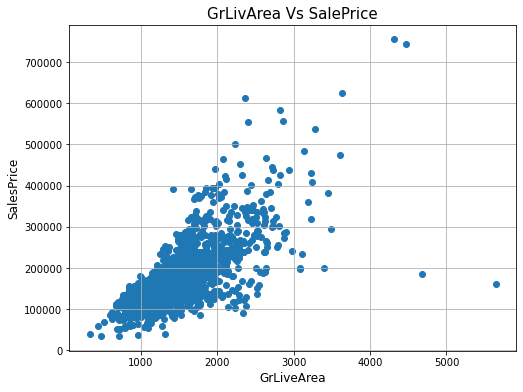

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.title('GrLivArea Vs SalePrice', fontsize = 15)
plt.xlabel('GrLiveArea', fontsize = 12)
plt.ylabel('SalesPrice', fontsize = 12)
plt.grid()
plt.show()

It is possible to see the relationship between `SalesPrice` & `GrLiveArea` and also the outliers present on the data in terms of `GrLiveArea`.

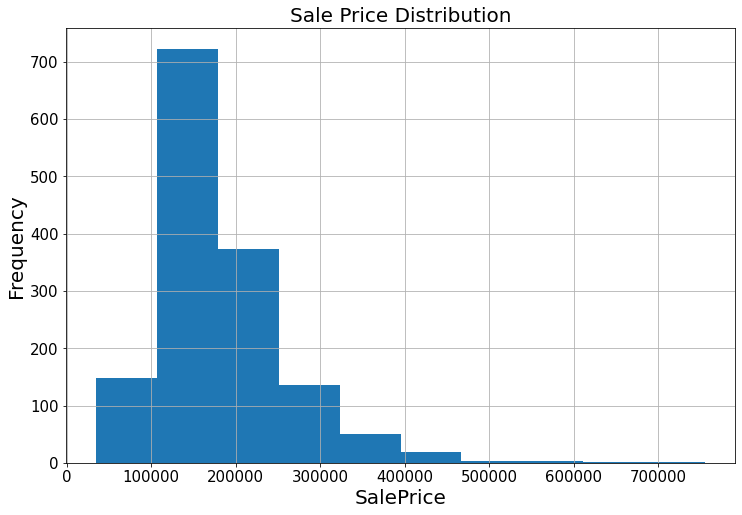

In [8]:
data['SalePrice'].hist(figsize = (12,8))
plt.xlabel('SalePrice', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Sale Price Distribution', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

### Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

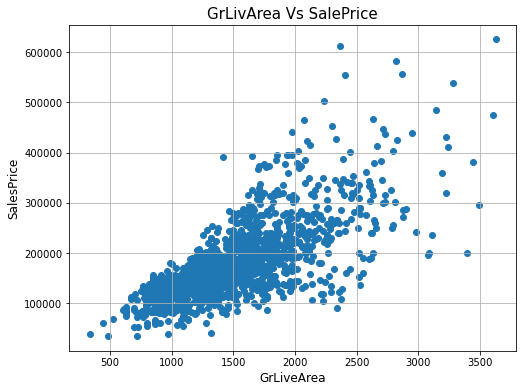

In [9]:
# Remove outliers for data['GrLivArea']>4000
data = data[data['GrLivArea']<4000]

#To Do Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.title('GrLivArea Vs SalePrice', fontsize = 15)
plt.xlabel('GrLiveArea', fontsize = 12)
plt.ylabel('SalesPrice', fontsize = 12)
plt.grid()
plt.show()

The noted outliers were removed from the `GrLiveArea` feature.

### Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API

In the code below the features will be split between *categorical* & *numerical*.

In [10]:
categorical = []
numerical = []
updated_columns = data.columns.values.tolist()
y = data.shape
for i in updated_columns:
    x = data[i].dtypes
    if x == object:
        categorical.append(i)
    else:
        numerical.append(i)

In [11]:
#To Ensure the columns are in fact numerical values
for i in numerical:
    data[i] = pd.to_numeric(data[i])

In [12]:
data.shape

(1456, 75)

#### Experiment to verify would what happens with the NaN by using `get_dummies`

In [13]:
data['GarageCond'].unique()
example = data['GarageCond'].to_frame()

In [14]:
new_example = pd.get_dummies(example)
new_example.head()

,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


As it is possible to see in the example above the `get_dummies` function ignored the **NaN values** when creating columns.

In [15]:
categorical_data = pd.get_dummies(data[categorical])
categorical_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
categorical_data.shape

(1456, 233)

**233** "dummy" columns would be created based on the values given in the categorical features.

In [17]:
#Join between the previous data set and the one created with dummy columns
df = pd.concat([data, categorical_data], axis = 1) 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0


In [18]:
df.shape

(1456, 308)

We can notice that the number of rows in our dataset remained the same and the number of columns is 75 (original set) + 233 (get_dummies) = 308.

In [19]:
#Drop the original categorical variables
df = df.drop(categorical, axis = 1)
df.shape

(1456, 270)

### Question 2.2: Impute missing data by the median of each column.

In [20]:
for i in numerical:
    df[i].fillna(df[i].median(), inplace=True)

### Question 2.2b: Make sure that there are no null values remaining

In [21]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > (df.shape[0])/2.5 : #50% of the data
        x = key
        missing_columns_names.append(x)
print(missing_columns_names)

[]


**No columns with missing values were found.**

### Final dataset shape

In [22]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


The final data set contains 1456 data points and 270 columns/features.

### Question 2.3: Generate train test split 70/30. Set random_state=42

**Assumption:**
- There is another unseen data set that will be used for the final Test once the model and hyperparameters are selected thru the train/validation set. This data set is not available on this analysis.

In [23]:
from sklearn.model_selection import train_test_split

my_list.remove('SalePrice')
features = df[my_list]
target = df['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [25]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

#Fit a linear regression model to this data
rm = LinearRegression()

# Fit the data(train the model)
rm.fit(X_train, y_train)

# Predict
y_predicted_train = rm.predict(X_train)
y_predicted_test = rm.predict(X_test)

### Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [26]:
#Compute the RMSE 
import math

def RMSE_performance(X_train, X_test, rm):
    # Predict
    y_predicted_train = rm.predict(X_train)
    y_predicted_test = rm.predict(X_test)

    MSE_train = np.sum(np.square(y_predicted_train - y_train)) / y_train.size
    MSE_test = np.sum(np.square(y_predicted_test - y_test)) / y_test.size

    RMSE_train = math.sqrt(MSE_train)
    RMSE_test = math.sqrt(MSE_test)
    
    return (RMSE_train, RMSE_test)

linear_reg_performance = RMSE_performance(X_train, X_test, rm)
print('RMSE_train: {}'.format(linear_reg_performance[0]))
print('RMSE_test: {}'.format(linear_reg_performance[1]))

RMSE_train: 18355.49191192785
RMSE_test: 23614.20759497074


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

### Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [27]:
from sklearn import linear_model

#Fit a linear regression model to this data
lasso = Lasso(alpha = 0.000001, max_iter=10000)

# Fit the data(train the model)
lasso.fit(X_train, y_train)

# Predict
y_predicted_train_lasso = lasso.predict(X_train)
y_predicted_test_lasso = lasso.predict(X_test)

#Compute the RMSE 
lasso_performance = RMSE_performance(X_train, X_test, lasso)
print('RMSE_train: {}'.format(lasso_performance[0]))
print('RMSE_test: {}'.format(lasso_performance[1]))

RMSE_train: 18355.49191192784
RMSE_test: 23685.269800758706


C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85331262555.02168, tolerance: 634515517.3913862
  model = cd_fast.enet_coordinate_descent(


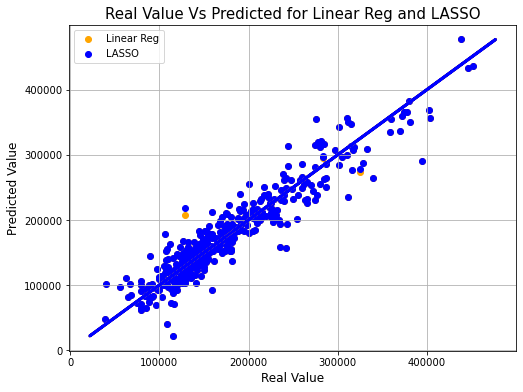

In [28]:
#To Do Create a scatter plot
plt.figure(figsize=(8, 6)).gca()

#Linear Regression
plt.scatter(y_test, y_predicted_test, label = 'Linear Reg', color="orange")
plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'orange')

#LASSO
plt.scatter(y_test, y_predicted_test_lasso, label = 'LASSO', color="blue")
plt.plot(y_predicted_test_lasso, y_predicted_test_lasso, linewidth=3, color="blue")

#General 
plt.title('Real Value Vs Predicted for Linear Reg and LASSO', fontsize = 15)
plt.xlabel('Real Value', fontsize = 12)
plt.ylabel('Predicted Value', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

In [29]:
#Comparison in performance
print('RMSE_test_linear_reg: {}'.format(linear_reg_performance[1]))
print('RMSE_test_lasso: {}'.format(lasso_performance[1]))

RMSE_test_linear_reg: 23614.20759497074
RMSE_test_lasso: 23685.269800758706


Both points and lines superposed each other, showing that with an `alpha` value as small as the one chosen for this analysis both models (linear regression and LASSO) lead to the same answers. Also it is possible to notice the pretty similar RMSE value.

### Another example using  LASSO but a different Alpha value

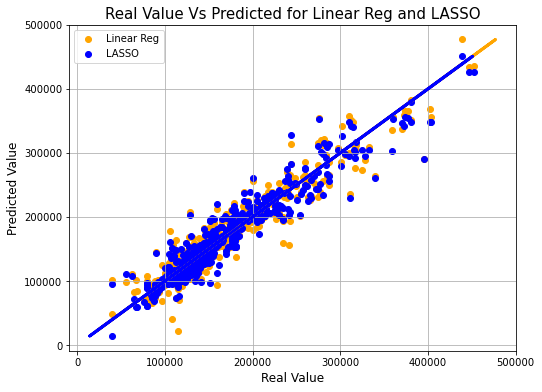

RMSE_test_linear_reg: 23614.20759497074
RMSE_test_lasso: 22120.506006819785
RMSE_test_linear_reg: 18355.49191192785
RMSE_test_lasso: 21292.50093020147


In [30]:
#Fit a linear regression model to this data
lasso_2 = Lasso(alpha = 200, max_iter=10000)

# Fit the data(train the model)
lasso_2.fit(X_train, y_train)

# Predict
y_predicted_train_lasso = lasso_2.predict(X_train)
y_predicted_test_lasso = lasso_2.predict(X_test)

#Compute the RMSE 
lasso_performance = RMSE_performance(X_train, X_test, lasso_2)

#To Do Create a scatter plot
plt.figure(figsize=(8, 6)).gca()

#Linear Regression
plt.scatter(y_test, y_predicted_test, label = 'Linear Reg', color="orange")
plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'orange')

#LASSO
plt.scatter(y_test, y_predicted_test_lasso, label = 'LASSO', color="blue")
plt.plot(y_predicted_test_lasso, y_predicted_test_lasso, linewidth=3, color="blue")

#General 
plt.title('Real Value Vs Predicted for Linear Reg and LASSO', fontsize = 15)
plt.xlabel('Real Value', fontsize = 12)
plt.ylabel('Predicted Value', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

#Comparison in performance
print('RMSE_test_linear_reg: {}'.format(linear_reg_performance[1]))
print('RMSE_test_lasso: {}'.format(lasso_performance[1]))

print('RMSE_test_linear_reg: {}'.format(linear_reg_performance[0]))
print('RMSE_test_lasso: {}'.format(lasso_performance[0]))

C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510054856257.70935, tolerance: 634515517.3913862
  model = cd_fast.enet_coordinate_descent(


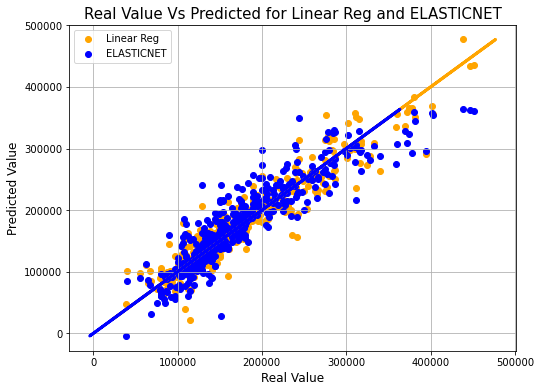

RMSE_test_linear_reg: 23614.20759497074
RMSE_test_elastic_net: 30034.286661241662
RMSE_train_linear_reg: 18355.49191192785
RMSE_train_elastic_net: 31692.08801173731


In [31]:
#Fit a linear regression model to this data
en = ElasticNet(alpha = 10, max_iter=10000)

# Fit the data(train the model)
en.fit(X_train, y_train)

# Predict
y_predicted_train_en = en.predict(X_train)
y_predicted_test_en = en.predict(X_test)

#Compute the RMSE 
en_performance = RMSE_performance(X_train, X_test, en)

#To Do Create a scatter plot
plt.figure(figsize=(8, 6)).gca()

#Linear Regression
plt.scatter(y_test, y_predicted_test, label = 'Linear Reg', color="orange")
plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'orange')

#LASSO
plt.scatter(y_test, y_predicted_test_en, label = 'ELASTICNET', color="blue")
plt.plot(y_predicted_test_en, y_predicted_test_en, linewidth=3, color="blue")

#General 
plt.title('Real Value Vs Predicted for Linear Reg and ELASTICNET', fontsize = 15)
plt.xlabel('Real Value', fontsize = 12)
plt.ylabel('Predicted Value', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

#Comparison in performance
print('RMSE_test_linear_reg: {}'.format(linear_reg_performance[1]))
print('RMSE_test_elastic_net: {}'.format(en_performance[1]))

#Comparison in performance
print('RMSE_train_linear_reg: {}'.format(linear_reg_performance[0]))
print('RMSE_train_elastic_net: {}'.format(en_performance[0]))

### Another example using but now using RIDGE and a different Alpha value

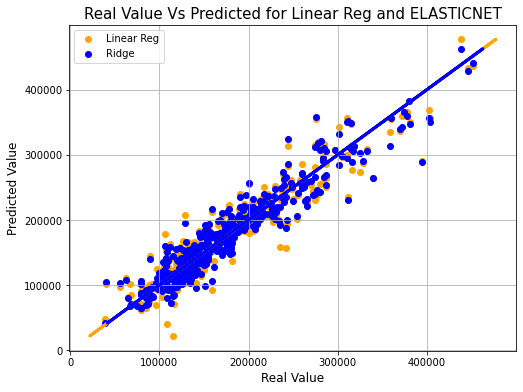

RMSE_test_linear_reg: 23614.20759497074
RMSE_test_elastic_net: 22037.038910744308
RMSE_train_linear_reg: 18355.49191192785
RMSE_train_elastic_net: 19681.643208331283


In [32]:
#Fit a linear regression model to this data
ri = Ridge(alpha = 10, max_iter=10000)

# Fit the data(train the model)
ri.fit(X_train, y_train)

# Predict
y_predicted_train_ri = ri.predict(X_train)
y_predicted_test_ri = ri.predict(X_test)

#Compute the RMSE 
ri_performance = RMSE_performance(X_train, X_test, ri)

#To Do Create a scatter plot
plt.figure(figsize=(8, 6)).gca()

#Linear Regression
plt.scatter(y_test, y_predicted_test, label = 'Linear Reg', color="orange")
plt.plot(y_predicted_test, y_predicted_test, linewidth=3, color = 'orange')

#RIDGE
plt.scatter(y_test, y_predicted_test_ri, label = 'Ridge', color="blue")
plt.plot(y_predicted_test_ri, y_predicted_test_ri, linewidth=3, color="blue")

#General 
plt.title('Real Value Vs Predicted for Linear Reg and ELASTICNET', fontsize = 15)
plt.xlabel('Real Value', fontsize = 12)
plt.ylabel('Predicted Value', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

#Comparison in performance
print('RMSE_test_linear_reg: {}'.format(linear_reg_performance[1]))
print('RMSE_test_elastic_net: {}'.format(ri_performance[1]))

#Comparison in performance
print('RMSE_train_linear_reg: {}'.format(linear_reg_performance[0]))
print('RMSE_train_elastic_net: {}'.format(ri_performance[0]))

Using `ELASTICNET` and an alpha value of 10 we cannot notice the difference in **RMSE**. Compared with the `LASSO` Model from before where we needed a bigger alpha to start noticing differences in this case the alpha value needed to see differences in performance is smaller.

The examples above are just to compare the differences between different penalization methods using similar alphas.

#### Function for analysis on questions below.

**NOTE:** Even though a cross validation function is available for Lasso, Ridge and ElasticNet (LassoCV, RidgeCV & ElasticNetCV) I decided not to use to visualize each of the performance points individually.

In [33]:
def regression_analysis(alpha_vals, regression_type, method):
    #Model training and calculations
    coefficients = []
    RMSE_train = []
    RMSE_test = []
    flag = 0
    number = []
    for i in alpha_vals:
        flag += 1 #Counter
        #Fit a linear regression model to this data
        model = regression_type(alpha = i, max_iter=100000, normalize = True)#The normalization will improve the speed as this is computationally expensive

        # Fit the data(train the model)
        model.fit(X_train, y_train)
        coefficients_i = model.coef_

        # Predict
        y_predicted_train_model = model.predict(X_train)
        y_predicted_test_model = model.predict(X_test)

        #Compute the RMSE 
        performance = RMSE_performance(X_train, X_test, model)
        RMSE_train_i = performance[0]
        RMSE_test_i = performance[1]

        RMSE_train.append(RMSE_train_i)
        RMSE_test.append(RMSE_test_i)
        coefficients.append(coefficients_i)
        number.append(flag)    

######################################   
    #Dataframe with performance values
    performance_data= pd.DataFrame({'alpha': alpha_vals, 'RMSE_Test': RMSE_test, 'RMSE_Train' : RMSE_train})
    print('First 10 Values of Analysis')
    print(performance_data.head(10))

######################################
    #To Do Create a scatter plot
    plt.figure(figsize=(6, 4)).gca()
    #Test
    plt.scatter(performance_data['alpha'], performance_data['RMSE_Test'], label = 'Test', color="orange")
    #Train
    plt.scatter(performance_data['alpha'], performance_data['RMSE_Train'], label = 'Train', color="blue")
    #General 
    plt.title('RMSE Vs Alpha for Train and Test Data for ' + method , fontsize = 12)
    plt.xlabel('Alpha', fontsize = 12)
    plt.ylabel('RMSE', fontsize = 12)
    plt.legend()
    plt.grid()
    plt.show()

    print('Apha for smallest RMSE Value')
    print(min(zip(performance_data['RMSE_Test'], performance_data['alpha'])))
    
######################################
    #Example of some of the coefficients (just 3), but not all the 270 Coefficients
    coeff_0 = []
    coeff_1 = []
    coeff_2 = []

    for i in range(len(alpha_vals)):
        coeffs = coefficients[i][0]
        coeffs1 = coefficients[i][1]
        coeffs2 = coefficients[i][2]
        coeff_0.append(coeffs)
        coeff_1.append(coeffs1)
        coeff_2.append(coeffs2)

    #Plots
    plt.scatter(alpha_vals, coeff_0, label = 'Coeff_0', color="orange")
    plt.scatter(alpha_vals, coeff_1, label = 'Coeff_1', color="blue")
    plt.scatter(alpha_vals, coeff_2, label = 'Coeff_2', color="red")

    #General 
    plt.title('Coefficients Vs Alpha for ' + method, fontsize = 15)
    plt.xlabel('Alpha', fontsize = 12)
    plt.ylabel('Coefficients Value', fontsize = 12)
    plt.legend()
    plt.grid()
    plt.show()

    #Zoom in to one of the coefficients of the anaysis
    #Plots
    plt.scatter(alpha_vals, coeff_2, label = 'Coeff_2', color="red")
    #General 
    plt.title('Coefficient Vs Alpha (Zoom In)', fontsize = 15)
    plt.xlabel('Alpha', fontsize = 12)
    plt.ylabel('Coefficient Value', fontsize = 12)
    plt.legend()
    plt.grid()
    plt.show()
    print('Example: Coefficient_2 last value')
    print(coefficients[-1][2])

### Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

### Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

### Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

**Note:**
Given the number of coefficients (number of features) the visual will be done with just a small number of examples.

In [34]:
#Lasso Regression
alpha_vals = np.arange(0.01, 300, 0.1) # values of alpha we want to iterate over
regression_type = Lasso
method = 'LASSO'

First 10 Values of Analysis
   alpha     RMSE_Test    RMSE_Train
0   0.01  23637.810154  18355.511109
1   0.11  23544.146257  18357.814401
2   0.21  23457.476536  18360.357130
3   0.31  23370.934939  18365.063659
4   0.41  23285.590144  18370.197259
5   0.51  23205.921269  18375.380238
6   0.61  23136.057977  18380.877180
7   0.71  23076.917405  18385.672254
8   0.81  23019.993568  18391.177383
9   0.91  22963.454526  18397.272516


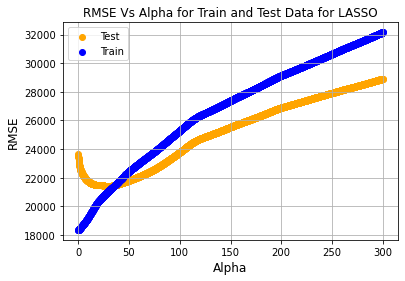

Apha for smallest RMSE Value
(21432.946124510552, 27.710000000000004)


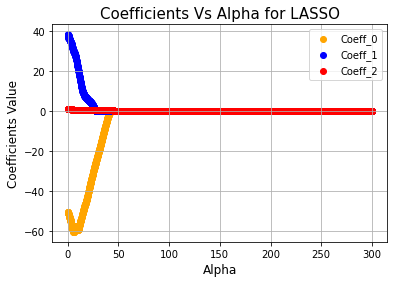

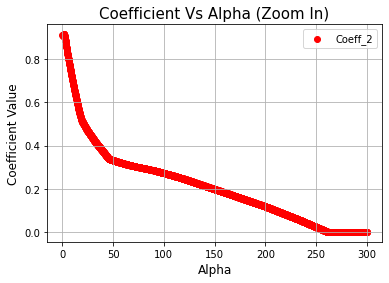

Example: Coefficient_2 last value
0.0


In [35]:
lasso_method = regression_analysis(alpha_vals, regression_type, method)

The `LASSO` regularization method shrink the coefficient to zero after alpha around 260.

### Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

### Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

### Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

**Note:**
Given the number of coefficients (number of features) the visual will be done with just a small number of examples.

In [36]:
#Ridge Regression
alpha_vals = np.arange(0.1, 10, 0.01) # values of alpha we want to iterate over
regression_type = Ridge
method = 'Ridge'

First 10 Values of Analysis
   alpha     RMSE_Test    RMSE_Train
0   0.10  22312.776173  18993.955499
1   0.11  22292.457167  19055.057476
2   0.12  22275.274404  19115.157498
3   0.13  22260.719638  19174.307233
4   0.14  22248.402067  19232.561889
5   0.15  22238.015309  19289.976726
6   0.16  22229.314962  19346.605118
7   0.17  22222.103009  19402.497526
8   0.18  22216.216754  19457.701029
9   0.19  22211.520832  19512.259187


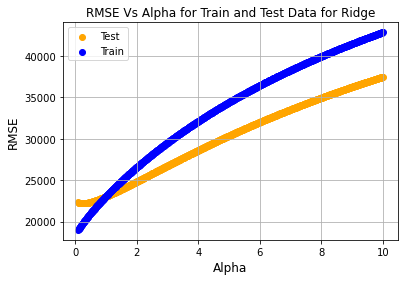

Apha for smallest RMSE Value
(22202.441984811507, 0.23999999999999994)


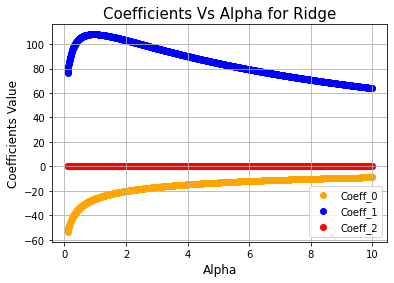

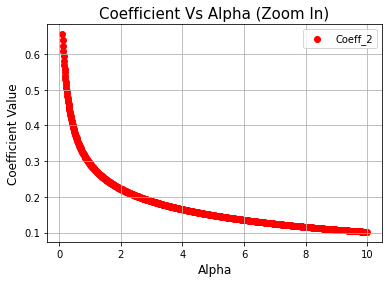

Example: Coefficient_2 last value
0.10181385252068612


In [37]:
ridge_method = regression_analysis(alpha_vals, regression_type, method)

### Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

In [44]:
alpha_vals = np.arange(0.0001, 1, 0.0001) # values of alpha we want to iterate over
regression_type = ElasticNet
method = 'ElasticNet'

First 10 Values of Analysis
    alpha     RMSE_Test    RMSE_Train
0  0.0001  22491.237180  18679.406485
1  0.0002  22308.631409  19005.650162
2  0.0003  22235.358062  19306.202536
3  0.0004  22206.772833  19586.575604
4  0.0005  22203.471634  19852.370831
5  0.0006  22216.979913  20107.267990
6  0.0007  22242.737407  20353.639463
7  0.0008  22277.956638  20593.064403
8  0.0009  22320.773148  20826.639127
9  0.0010  22369.870262  21055.153412


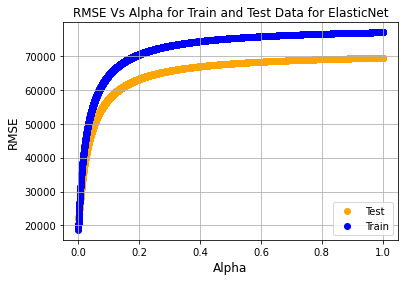

Apha for smallest RMSE Value
(22203.47163406324, 0.0005)


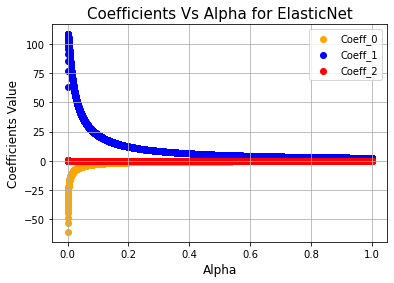

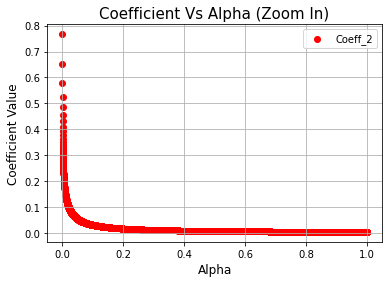

Example: Coefficient_2 last value
0.003532609197429817


In [45]:
elasticnet_method = regression_analysis(alpha_vals, regression_type, method)

For all intended purposes the *coefficient_2* was shrunk all the way to zero using the `ElasticNet` method.

### Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of  `Ridge`, `Lasso`, and `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

Extra analysis might be needed to see why **Ridge** and **ElasticNet** yield higher RMSE values with very small alphas. At the same time it is expected to see a faster change in the model by using Ridge regularization (and as a consequence ElasticNet) given the quadratic nature of such method.

Based on this analysis:

| Regularization | Alpha |
| --- | --- |
| LASSO | 27.71 |
| Ridge | 0.24 |
| ElasticNet | 0.0005 |

### Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

This particular assignment was a little bit more challenging than the previous ones since I came to this project with very little experience on seeing the alpha factor as another important hyperparameter when using regularization to optimize linear regression. I see the importance of understanding this concept very well as it can be applied to basically many other ML methods as a way to select the features that are actually important for the model (embedded feature selection method). Also, this is a critical topic when talking about neural networks which basically a method using series of linear/logistic regressions happening at the same time.

The take away from this assignment and the link to real-world problems is in the value of the correct hyperparameter, which unfortunately cannot be known in advance and requires some experimentation (potentially cross validation and/or grid/random search methods).